# Importações de dados brutos

In [1]:
!pip install util-gfsilveira

In [2]:
import os
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
from util import *

meus_uteis()

-------------
-=< Lista >=-
-------------
0 -> printLinha()
1 -> printLis()
2 -> printDic()
3 -> timeProcess()
4 -> import_started()
5 -> img_save()
6 -> setup_img_save()
7 -> mask_corr_graphic()
8 -> structured_confusion()


In [4]:
dir = os.listdir()
printLis(dir)

-------------
-=< Lista >=-
-------------
0 -> .config
1 -> dados
2 -> .ipynb_checkpoints
3 -> df_mysql.gz
4 -> perguntas.gz
5 -> sample_data


In [5]:
perguntas = joblib.load(dir[4])
df = joblib.load(dir[3])
df.head()

,Data,IP,TCLE,Língua,Figura,Dintinguíveis,Proeminentes,Descrição,Eficiente,Útil,Estética,Fonte,Compreensão,Interesse,Grau,Área,Origem
id,,,,,,,,,,,,,,,,,
1,2020-03-02 13:31:20,200.134.9.2,s,pt,Reovírus Aviário,2,1,Sim,1,5,2,Sim,1,1,Doutorado,Exatas,Pesquisador
2,2020-03-02 17:45:41,191.52.71.228,s,pt,Reovírus Aviário,3,3,Sim,2,2,4,Não,4,2,Doutorado,Biológicas,Designer
3,2020-03-02 18:32:50,189.14.35.136,s,pt,Células Tronco,4,3,Sim,3,5,4,Não,3,3,Doutorado,Exatas,Pesquisador
4,2020-03-02 19:33:38,170.239.53.11,s,pt,Células Tronco,4,4,Sim,5,5,5,Sim,5,5,Mestrado,Biológicas,Designer
5,2020-03-03 11:50:20,189.103.158.150,s,pt,T. gondii,5,1,Sim,5,5,2,Sim,5,4,Doutorado,Biológicas,Pesquisador


# Filtrando apenas perguntas

In [7]:
printLis(df.columns)

-------------
-=< Lista >=-
-------------
0 -> Data
1 -> IP
2 -> TCLE
3 -> Língua
4 -> Figura
5 -> Dintinguíveis
6 -> Proeminentes
7 -> Descrição
8 -> Eficiente
9 -> Útil
10 -> Estética
11 -> Fonte
12 -> Compreensão
13 -> Interesse
14 -> Grau
15 -> Área
16 -> Origem


In [10]:
columns = list(df.columns[[5,6,8,9,10,12,13,16]])
columns

['Dintinguíveis',
 'Proeminentes',
 'Eficiente',
 'Útil',
 'Estética',
 'Compreensão',
 'Interesse',
 'Origem']

In [11]:
df_perg_quant = df[columns].copy()
df_perg_quant.head()

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse,Origem
id,,,,,,,,
1,2,1,1,5,2,1,1,Pesquisador
2,3,3,2,2,4,4,2,Designer
3,4,3,3,5,4,3,3,Pesquisador
4,4,4,5,5,5,5,5,Designer
5,5,1,5,5,2,5,4,Pesquisador


In [12]:
df_perg_quant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 1 to 472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dintinguíveis  472 non-null    int32 
 1   Proeminentes   472 non-null    int32 
 2   Eficiente      472 non-null    int32 
 3   Útil           472 non-null    int32 
 4   Estética       472 non-null    int32 
 5   Compreensão    472 non-null    int32 
 6   Interesse      472 non-null    int32 
 7   Origem         472 non-null    object
dtypes: int32(7), object(1)
memory usage: 20.3+ KB


In [16]:
corr_pesq = df_perg_quant[df_perg_quant.Origem == 'Pesquisador'].corr().round(3)
corr_pesq

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
Dintinguíveis,1.000,0.770,0.757,0.360,0.615,0.715,0.630
Proeminentes,0.770,1.000,0.732,0.324,0.664,0.656,0.650
Eficiente,0.757,0.732,1.000,0.380,0.663,0.761,0.650
Útil,0.360,0.324,0.380,1.000,0.400,0.413,0.361
Estética,0.615,0.664,0.663,0.400,1.000,0.632,0.670
Compreensão,0.715,0.656,0.761,0.413,0.632,1.000,0.714
Interesse,0.630,0.650,0.650,0.361,0.670,0.714,1.000


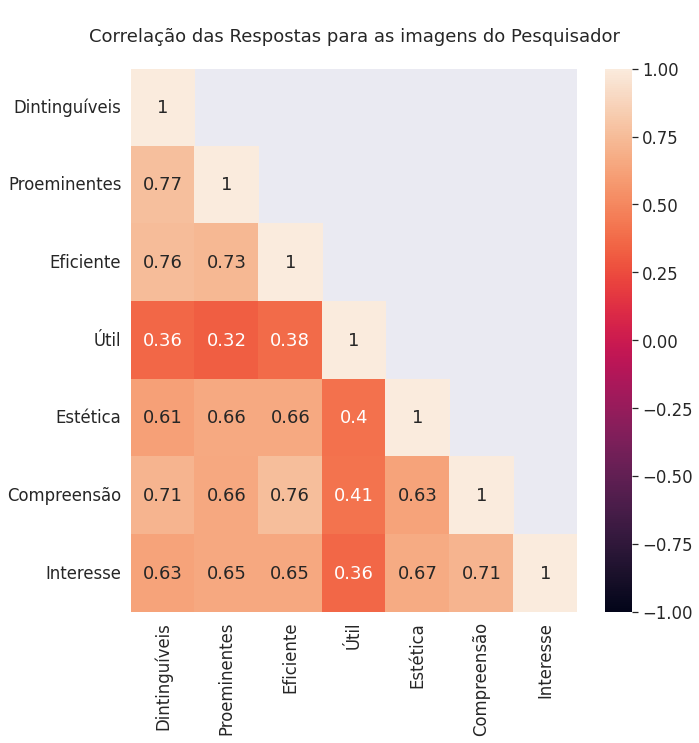

In [26]:
sns.set(font_scale=1.5)

plt.figure(figsize=(10,10))
sns.heatmap(
    vmax=1,
    vmin=-1,
    annot=True,
    data=corr_pesq,
    mask=mask_corr_graphic(7)
)
plt.title('\nCorrelação das Respostas para as imagens do Pesquisador\n')
plt.show()

In [27]:
corr_desg = df_perg_quant[df_perg_quant.Origem != 'Pesquisador'].corr().round(3)
corr_desg

,Dintinguíveis,Proeminentes,Eficiente,Útil,Estética,Compreensão,Interesse
Dintinguíveis,1.000,0.769,0.700,0.462,0.610,0.711,0.627
Proeminentes,0.769,1.000,0.667,0.374,0.608,0.648,0.602
Eficiente,0.700,0.667,1.000,0.437,0.537,0.759,0.660
Útil,0.462,0.374,0.437,1.000,0.344,0.428,0.479
Estética,0.610,0.608,0.537,0.344,1.000,0.643,0.617
Compreensão,0.711,0.648,0.759,0.428,0.643,1.000,0.708
Interesse,0.627,0.602,0.660,0.479,0.617,0.708,1.000


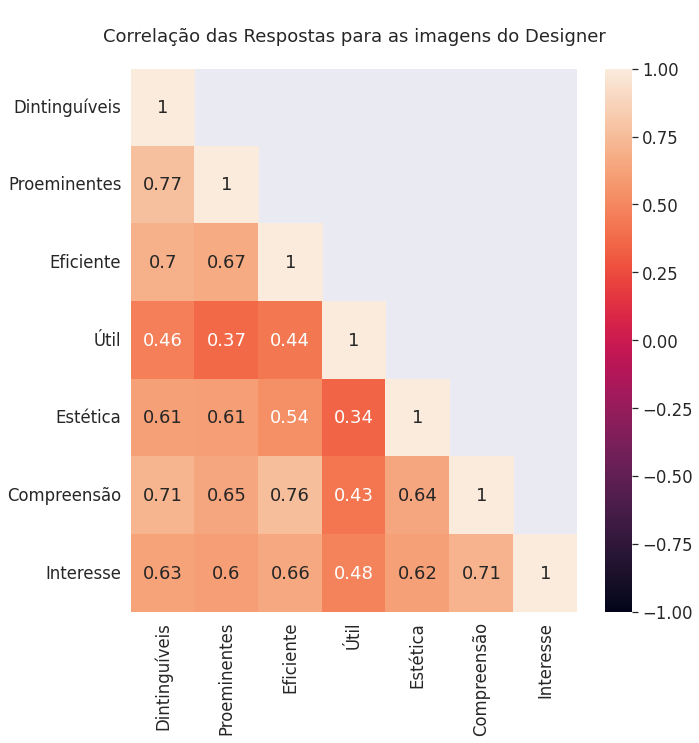

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(
    vmax=1,
    vmin=-1,
    annot=True,
    data=corr_desg,
    mask=mask_corr_graphic(7)
)
plt.title('\nCorrelação das Respostas para as imagens do Designer\n')
plt.show()

# Exportar para pdf

In [1]:
# !python --version

In [2]:
# !pip freeze

In [4]:
## Conectar ao Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
## Instalar Text-Line
# % cd drive/MyDrive/Colab\ Notebooks
# !sudo apt-get update
# !sudo apt-get install texlive-full -y

In [7]:
## Exportar para PDF
# !jupyter nbconvert --to pdf 04-Fatorial_analysis_2022-03-28.ipynb